<a href="https://colab.research.google.com/github/NDTretiak/Asian-butterfly-spread.-Moment-Matching-Monte-Carlo-Heston-Model/blob/main/Asian_Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

1.   **European call option**

* A European call option is a financial instrument that provides a right (not an obligation) to buy one share of a stock at $S$ at a prespecified price $K$ (strike price) and time $ T $ (maturity).
*   a payoff of European option can be presented as $\phi (S_T)$ where  function $\phi$ has the following form:
$$\phi (x) = (x-K)^+$$
*   As it can be seen, the payoff does not depend on the path price $S_{t}$ where ${t: t\leq T}$. Therefore, a European option is not path-dependent.
2. **Asian call option**  
*    An Asian call has similar properties to the European call option, but at prespecified time $T$ it pays the difference between average (arithmetic and geometric) and strike price $K$. an average is computed based on the price of asset at times $0 < t_1 < t_2 < ... < t_n =T$. Therefore, An Asian call option is path-dependent
*   The payoff of an arithmetic Asian call option can be represented as $\phi(A_{T}(n))$ where:
$$A_{T}(n) = \frac{1}{n}\sum_{i=1}^{n}S_{t_i}$$


3. **Option pricing**  


*   The fair price of an option is the risk-neutral expectation of the discounted payoff:$$e^{-rT}\mathbb{E}[\phi(•)]$$
*   for European call option it has the following form $$e^{-rT}\mathbb{E}[\phi(S_T)]$$
where we can compute the expectation in the following way
$$\mathbb{E}[\phi(S_T)] = \int \phi(x)f_{S_T}(x)dx = \int (x-K)^+f_{S_T}(x)dx$$
In case $S$ follows a Geometrical Brownian motion, distribution function $f_{S_T}(x)$ is lognormal, which is known in explicit form. The solution of the integral with discounting gives well well-known Black-Scholes formula.
* In the case of the Asian option the fair price is the following: $$e^{-rT}\mathbb{E}[\phi(A_T(n))]$$
where
$$\mathbb{E}[\phi(A_T(n))] = \int \phi(x)f_{S_T}(x)dx = \int (x-K)^+f_{A_T(n)}(x)dx$$
Unfortunately, the $f_{A_T(n)}$ is unknown in analytical form. Therefore, we have to use other methods than the Black-Scholes formula and it gives multiple complications.

**Asian Butterfly spread**

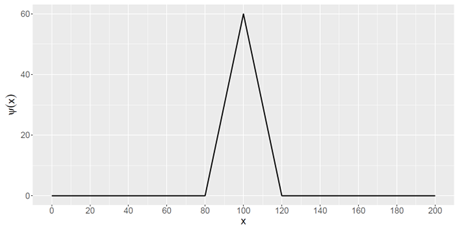

The aim of this project is to price Asian Butterfly spread. It is a combination of the Asian call option with the underlying variable $A_T(n)$ (arithmetic average). In the picture, you can see the payoff of the spread.


# <center> Question 1

***1.1*** Assume we have an Asian butterfly spread option. From the
 the previous picture, find the analytical expression of the payoff
function $\phi(x)$ and the pricing formula of this product.


The analytical expression for a given payoff function $\phi$ is :
\begin{equation}
\phi=
\left\lbrace
\begin{array}{ccc}
0  & \mbox{if} & x \in [0;80] \cup ]120;200] \\
3.(x-80) & \mbox{if} & x \in [80;100]\\
-3.(x-120) & \mbox{if} & x \in [100;120]
\end{array}\right.
\end{equation}
However, this form of payoff function is not convenient for pricing. Therefore, we want to find another analytical expression.
As we know, a long butterfly spread is a combination of long and short European call options. Generally, it has the following forms: $$ V(K_{1}, K_{2}, K_{3},T) = Call(K_{1},T) + Call(K_{3},T) - 2 Call(K_{2},T) $$
As we want to have the analytical expression for the given payoff function on the graph, we should multiply the butterfly spread by a factor of 3. We have :
\begin{equation}
   \phi(S_{T}) = 3[(S_{T}-K_{1})^+ + [(S_{T}-K_{3})^+ -2[(S_{T}-K_{3})^+]
\end{equation}
Where
\begin{equation}
(x-a)^+=
\left\lbrace
\begin{array}{ccc}
(x-a) & \mbox{if} & x > a \\
0 & \mbox{if} & x \leq a\\
\end{array}\right.
\end{equation}
We will use formula the last formula for pricing the given product.

***1.2*** Approximate $f_{A_T(n)}$ as a log-normal distribution then compute
the product price using a Black-Scholes type formula.

Here we will price an Asian call option. The payoff of this option can be written as :
$$ \phi(A_{T}(n))$$
where  $A_{T}(n)= \frac{1}{n}\sum_{i=1}^n S_{t_{i}}$  and  $0<t_{1}<t_{2}<...<t_{n}=T$.
It pays at time $T$ the positive difference between the average price $A_{T}(n)$ of $S_{t_{i}}$ over a certain set of previous time and strike K. Therefore this option is path-dependent.
For Asian call option the price is the risk-neutral expectation of discounted payoff: $$ e^{-rT} \mathbb{E}[\phi(A_{T}(n))] $$
where $\mathbb{E}$ denotes risk neutral expectation.$$$$
We can rewrite it:
\begin{equation}
\mathbb{E}[\phi(A_{T}(n))]= \int (x-K)^{+} f_{A_{T}(n)} (x) d x
\end{equation}
The main problem is that the analytical distribution function $f_{A_{T(n)}}$ is unknown. To approximate the distribution we will use the moment matching method.


Assume S follows a Geometric Brownian Motion.
\begin{equation}
d S_{t}= r S_{t} dt + \sigma S_{t} dW_{t}
\end{equation}
for $\delta > 0 $, $t_{i}=i\delta$, $i\in [1,...,n]$, $n=\frac{T}{\delta}$
$$$$or, equivalently
\begin{equation}
S_{t+\delta}=S_{t}e^{(r-\frac{\sigma}{2})\delta+\sigma\sqrt{\delta}Z}, Z\backsim\mathcal{N}(0,1)
\end{equation}
Therefore the price S distribution is based on the lognormal distribution which has the following probability density function :
$$g(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{(-\frac{(\mu - \ln{x})^{2}}{2\sigma^2 })} \frac{1}{x} ; x>0$$
 where  $\mu \in \mathbb{R}, \sigma > 0$


Let X be a lognormally distributed random variable with parameters $\mu$ and $\sigma$.
Then the first two moments of X are :
\begin{equation}
    E[X] = e^{\mu + \frac{1}{2} \sigma ^2}
\end{equation}
\begin{equation}
    E[X^2] = e^{2 \mu + 2 \sigma ^2}
\end{equation}
Let's derive this result.$$$$
Let $Z$ be a random variable that is normally distributed   $Z  \backsim \mathcal{N}(\mu,\sigma)$. Then $X = e^Z$ is lognormal. In order to find the first and second moment we can use the moment generating function of normally distributed random variable. $$E[X] = E[e^Z] = \psi_Z(1) = e^{\mu + \frac{1}{2}\sigma^2}$$
$$E[X^2] = E[e^{2*Z}] = \psi_Z(2) = e^{2\mu + 2\sigma^2}$$
where we used that: if $Z\backsim\mathcal{N}(\mu,\sigma^2)$ the moment generating function is $$\psi_{Z}(u) =e^{u\mu + \frac{u^2\sigma^2}{2}}$$


We will use $f_{S_T}$ to approximate $f_{A_{T(n)}}$ by matching their moments as distribution of $f_{S_T}$ is known in analitical form.
Let's find the first two moments of $f_{A_{T(n)}}$.


$$A_{T}(n)= \frac{1}{n}\sum_{i=1}^n S_{t_{i}}$$
Also we will use next representation of Geometric Brownian Motion:
$$S_{t+\delta} = S_{t} e^{(r-\frac{\sigma^{2}}{2})\delta + \sigma \sqrt\delta Z} $$
where : $Z \backsim \mathcal{N}(0,1)$$$$$
Let's find the first two moments of $A_{T(n)}$.
$$E[A_{T}(n)]$$
$$=E\left[\frac{1}{n}\sum_{i=1}^n S_{t_{i}}(n)\right]$$
$$=\frac{1}{n}\sum_{i=1}^n E\left[ S_{0} e^{(r-\frac{\sigma^{2}}{2})t_{i} + \sigma \sqrt t_{i} Z} \right]$$
$$=\frac{1}{n}\sum_{i=1}^n S_{0}  e^{(r-\frac{\sigma^{2}}{2})t_{i}} \: \mathbb{E} \left[ e^{ \sigma \sqrt t_{i} Z} \right]  $$
$$=\frac{1}{n}\sum_{i=1}^n S_{0} \: e^{(r-\frac{\sigma^{2}}{2})t_{i}} \: e^{\frac{\sigma^{2}t_{i}}{2}} $$
$$=\frac{S_{0}}{n} \sum_{i=1}^n e^{r} \delta_{i}$$
Let's use the following formula for arithmetic progression:

 $$   \sum_{i=1}^{n} e^{a i} = \frac{e^a-e^{a(n+1)}}{1-e^a}$$
After substitution we have:
\begin{equation}
    m_1 = E[A_T(n)] = \frac{S_0}{n}\frac{e^{r \sigma}- e^{r \sigma (n+1)}}{1-e^{r \sigma}}
\end{equation}


The computation of second moment is more difficult, so we provide here just formula without proof.
\begin{equation}
    m_2 = E[A_T^2 (n)] = (\frac{S_0}{n})^2\left[\frac{2e^{(r + \sigma^2)\delta}}{1 - e^{(r + \sigma^2)\delta}} \times \frac{e^{2r\delta - e^{r\delta(n+1)}}}{1-e^{r\delta}} - 2\frac{e^{2(2r + \sigma^2)\delta} - e^{(2r + \sigma^2)\delta(n+1)}}{(1-e^{(r + \sigma^2)\delta})(1 - e^{(2r+ \sigma^2)\delta})} + \frac{1 - e^{(2r+ \sigma^2)\delta n}}{1 - e^{(2r+ \sigma^2)\delta}}\times e^{(2r+\sigma^2)\delta}\right]
\end{equation}

Now, we will find the parameters of lognormal distribution which correspond to $E[A_T (n)]$ and $Var[A_T(n)]$.


Therefore,using the first two moments of the lognormal random variable we have the following system :
\begin{equation}
\left\lbrace
\begin{array}{ccc}
m_{1} & = &  e^{\hat{\mu}+ \frac{1}{2} \hat{\sigma} ^2} \\
m_{2} & = &  e^{2 \hat{\mu} + 2 \hat{\sigma} ^2}\\
\end{array}\right.
\end{equation}
The solution to the system of equations is:
\begin{equation}
\left\lbrace
\begin{array}{ccc}
\hat{\mu} & = & \ln \left( \frac{m_{1}^{2}}{\sqrt{m_{2}}}\right) \\
\hat{\sigma} & = & \sqrt{\left(\ln(\frac{m_{2}}{m_{1}^{2}}) \right)}\\
\end{array}\right.
\end{equation}

Therefore we can approximate the lognormal distribution of $A_T(n)$ :
$$f_{A_T(n)}(x) = \frac{1}{x\hat{\sigma} \sqrt{2\pi}} \exp {-\frac{(\hat{\mu}-\ln{x})^2}{2 \hat{\sigma}^2}},x>0$$
Now the formula of $ E[\phi[A_T(n)]]$ has the following form :
$$E[\phi[A_T(n)]] = E[(\frac{1}{n}\sum_{i=1}^n S_{t i} - K)^+] $$
$$ = [e^{\hat{\mu}+ \frac{\hat{\sigma}^2}{2}} \Phi(d_1) - K \Phi(d_2)]*e^{-rT} $$
where :
\begin{align*}
d_1 = \frac{\hat\mu - \ln{K} + \hat\sigma^2}{\hat\sigma} \qquad
\qquad d_2 = \frac{\hat\mu - \ln{K}}{\hat\sigma}
\end{align*}
with $\Phi(x)$ being a cdf of a $\mathcal{N} (0,1)$

Let's compute the price of an Asian Butterfly spread that is based on Asian call option with the following parameters : $r = 1\%, \: \sigma = 18\%, \: T = 2, \: S_{0} = 100, \: K_{1} = 80, \: K_{2}=100, \: K_{3}=120, \: \delta = \frac{1}{252} \:$ and $\: n = \frac{T}{\delta}= 504$

In [29]:
S0 = 100
r = 0.01
sigma = 0.18
delta = 1/252
T = 2
n = int(T/delta)

First of all, we will compute the second moment $m_2$ using Monte Carlo simulations.

In [30]:
from math import exp
def m_2(n,S0,r,sigma,delta):
  d1 = ((exp((r+sigma**2)*delta))/(1 - exp((r+sigma**2)*delta)))
  d2 = (exp(2*r*delta) - exp(r*delta*(n+1)))/(1 - exp(r*delta))
  d3 = (exp(2*(2*r+sigma**2)*delta) - exp((2*r+sigma**2)*delta*(n+1)))/((1 - exp((r + sigma**2)*delta))*(1 - exp((2*r + sigma**2)*delta)))
  d4 = ((1 - exp((2*r+sigma**2)*delta*n))/(1 - exp((2*r+sigma**2)*delta)))*exp((2*r+sigma**2)*delta)
  return (S0/n)**2*(2*d1*d2-2*d3+d4)

In [31]:
#m2 =sum([10_000*m_2(30_000,S0/100,r,sigma,delta,T) for _ in range(M)])/M
m2 = m_2(n,S0,r,sigma,delta)

In [32]:
m1 = (S0/n)*((1-exp(r*T))/(exp(-r*delta)-1))

When we have moments $m_1$ and $m_2$ we can compute approximations for $\hat \mu$ and $\hat \sigma$.

In [33]:
import math
ln = math.log
mu_aprox = ln((m1**2)/(m2**0.5))
sigma_aprox = (ln(m2/(m1**2)))**0.5
mu_aprox,sigma_aprox

(4.60426174011326, 0.14795238214679943)

As it can be seen $ \hat{\sigma} < \sigma. $It is because of the price at the end is the mean average of prices overall time. This is why, the volatility is reduced.

Let's do the pricing of the given Asian Butterfly spread.
$$\phi(A_T) = 3[(A_T - K_1)^+ +(A_T - K_3)^+ -2(A_T - K_2)^+]$$
$$e^{-rT} \mathbb{E}[\phi(A_T)] = 3 e^{-r T} E[(A_T - K_1)^+ +(A_T - K_3)^+ -2(A_T - K_2)^+] = 3 e^{-r T}[\mathbb{E}(A_T - K_1)^+ +\mathbb{E}(A_T - K_3)^+ -2\mathbb{E}(A_T - K_2)^+]$$
Therefore,
$$V_0(K_1,K_2,K_3,T) = 3[V_0(K_1,T) + V_0(K_3,T) - 2 V_0(K_2,T)]$$

where, in ordr to compute $V_0(•)$ we will use Black-Scholes formula with approximations $\hat \mu$ and $\hat \sigma$:
$$V_0(K_1,T) = [e^{\hat \mu + \frac{\hat \sigma ^2}{2}}\Phi(d_1) - K\Phi(d_2)]*e^{-rT}$$
where:
$$d_1 = \frac{\hat \mu - \ln(K)}{\hat \sigma} + \hat \sigma$$
$$d_2 = d_1 - \hat \sigma = \frac{\hat \mu - \ln(K)}{\hat \sigma}$$

Let's compute $V_0(•,T)$ for different strike prices K.

In [34]:
from scipy.stats import norm
F = norm.cdf
def V(K,mu,sigma,S0,r):
  d_1 = ((mu-ln(K))/sigma) + sigma
  d_2 = d_1 - sigma
  return (exp(mu + 0.5*sigma**2)*F(d_1) - K*F(d_2))*exp(-r*T)

In [35]:
V_1 = V(80,mu_aprox,sigma_aprox,S0,r)
V_2 = V(100,mu_aprox,sigma_aprox,S0,r)
V_3 = V(120,mu_aprox,sigma_aprox,S0,r)

In [36]:
V_1,V_2,V_3

(20.912585575100877, 6.317152721232105, 0.9612720583743702)

In [37]:
V_0 = 3*(V_1+ V_3 - 2 * V_2)

In [38]:
V_0

27.71865657303311

We can notice that $K_1 < K_2 < K_3$
and $V_{0}(K_1) > V_{0}(K_2) >V_{0}(K_3)$.
Given that the $S_0 = 100$ is the same for all call options, the $V_0(K)$ decreases with $K$.
$$$$
Therefore the product price is :
$$V_0(K_1,K_2,K_3,r) = 27.72$$


# <center> Question 2

**2.1** Compute the price of this Asian butterfly spread via Monte
Carlo simulation. Compare with the price obtained in 1.2.
Explain where the differences come from, if any.

In [39]:
S0 = 100
r = 0.01
sigma = 0.18
delta = 1/252
T = 2
K = 100
n = int(T/delta)

In [40]:
from math import exp
import numpy as np
import pandas as pd

def Monte_Carlo(N,S0,r,sigma,delta,T,K):
    n = int(T/delta)
    f = lambda x: exp((r- 0.5*sigma**2)*delta)*exp(sigma * delta**0.5)**x
    df = pd.DataFrame({"init":[S0]*N})
    df["sum"] = S0
    for _ in range(1,n):
      mul = f(np.random.normal(0, 1, N))
      df["init"] = df["init"]*mul
      df["sum"] += df["init"]
    df["mean"] = df["sum"]/n - K
    R = df.loc[df["mean"] > 0,"mean"].sum()/N
    STD = df.loc[df["mean"] > 0,"mean"].var(ddof=1)
    return R*exp(-r*T),STD

In [41]:
M = 5
N = 100_000
V_1 = pd.DataFrame([Monte_Carlo(N,S0,r,sigma,delta,T,80) for _ in range(M)],columns = ["Value","Variance"])
V_2 = pd.DataFrame([Monte_Carlo(N,S0,r,sigma,delta,T,100) for _ in range(M)],columns = ["Value","Variance"])
V_3 = pd.DataFrame([Monte_Carlo(N,S0,r,sigma,delta,T,120) for _ in range(M)],columns = ["Value","Variance"])

In [42]:
V_1_Val,V_1_Var = V_1.mean(axis = 0)[0],V_1.mean(axis = 0)[1]
V_2_Val,V_2_Var = V_2.mean(axis = 0)[0],V_2.mean(axis = 0)[1]
V_3_Val,V_3_Var = V_3.mean(axis = 0)[0],V_3.mean(axis = 0)[1]
V_1_Val,V_2_Val,V_3_Val

(20.86649906476731, 6.276502454261323, 0.99183385688758)

In the computations of call options, we compute M groups of prices. Finally, we compute mean among these groups. As the groups have the same size we use the following formula to compute the pooled variance.
$$s_p^2 = \sum_{i=1}^{M}\frac{s_i^2}{M}$$

In [43]:
V_0 = 3*(V_1_Val+ V_3_Val - 2 * V_2_Val)
V_0

27.91598403939674

The price of the Asian butterfly spread based on the European Asian call option is the following: $V_0$ = V_0

Let's compute the variance of the computations using the sum of variance formula:
$$var(\sum_{i=1}^{N}a_iX_i) = \sum_{i=1}^{M}a_i^2var(X_i)$$
Therefore:
$$var(3[V_0(K_1,T) + V_0(K_3,T) - 2 V_0(K_2,T)]) = 9(var(V_0(K_1,T)) + var(V_0(K_3,T)) + 4var(V_0(K_2,T)))$$

In [44]:
Var_V_0 = 9*(V_1_Var + V_3_Var + 4*V_2_Var)
Var_V_0

6597.304919365126

Let's now compute standard deviation and 95 % confidence interval for the computed price:$$[V_0 - 1.96*\frac{S.D}{\sqrt N},V_0 + 1.96*\frac{S.D}{\sqrt N}]$$

In [45]:
SD = (Var_V_0/N)**0.5
CI = 1.96*SD
V_0 - CI, V_0 + CI

(27.412553740564487, 28.419414338228993)

As can seen Monte Carlo simulations give slightly higher results than the moment matching method, but the MMM result is in the confidence interval of MC. Therefore, we can conclude that moment-matching results are quite good, however, need some improvements. For instance, more moments can be matched.


**2.2** Analyze the impact of the number of simulated trajectories n,
and justify your observations.

Let's visualize the Geometric Brownian Motions that are used in Monte Carlo simulations.

In [46]:
def GBM(N,S0,r,sigma,delta,T,K):
  n = int(T/delta)
  f = lambda x: exp((r- 0.5*sigma**2)*delta)*exp(sigma * delta**0.5)**x
  df = pd.DataFrame(np.zeros((N,n)))
  df[df.columns[0]] = S0
  for i in range(1,n):
    mul = f(np.random.normal(0, 1, N))
    df.loc[:,i] = df.loc[:,i-1]*mul
  return df

In [47]:
N = 100
df = GBM(N,S0,r,sigma,delta,T,K)

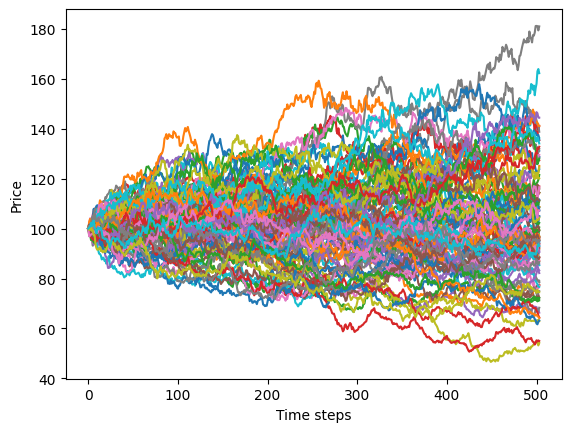

In [48]:
import matplotlib.pyplot as plt
df.T.plot(legend = False)
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.show()

As we can see in the figure number of trajectories increases with N and it ensures more accurate results.


Here we will plot the price changes computed for different n. We will choose strike price $K$ the as same as the initial stock price $S_0$. Results for other strike prices are similar.


# <center> Number of simulations n

In [49]:
K = 100
x = np.logspace(1,4.4,200)
R = [Monte_Carlo(int(i),S0,r,sigma,delta,T,K) for i in x ]
price,var = list(zip(*R))
SD = [i/j for i,j in zip(var,x)]

<ipython-input-50-20bd2bc14e1b>:13: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0].get_shared_x_axes().join(axs[0], axs[1])


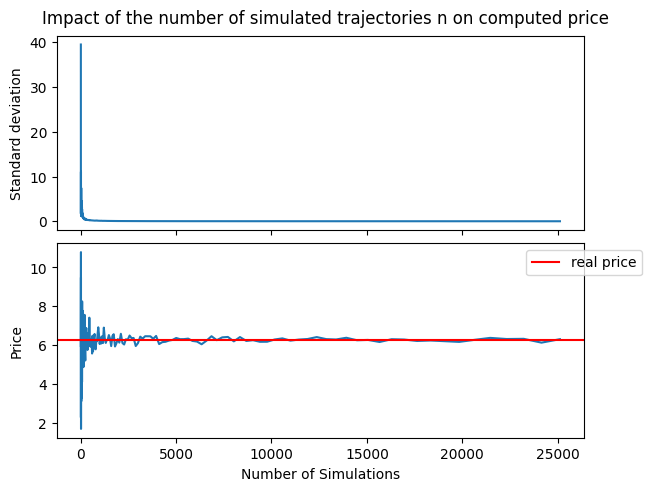

In [50]:
fig, axs = plt.subplots(2,constrained_layout = True)
fig.suptitle('Impact of the number of simulated trajectories n on computed price')
#fig.tight_layout(pad=2.5)

axs[0].plot(x, SD)
axs[0].set_ylabel('Standard deviation')

axs[1].plot(x, price)
axs[1].set_xlabel('Number of Simulations')
axs[1].set_ylabel('Price')
plt.axhline(y = V_2_Val, color = 'r', linestyle = '-',label = "real price")

axs[0].get_shared_x_axes().join(axs[0], axs[1])
axs[0].set_xticklabels([])

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.show()



As can be seen from the figures above, the computed price converges to the real price as n increases. Also, standard deviation has the form of $\frac{const.}{\sqrt N}$ as is predicted by the theory of Monte Carlo simulations.


**2.3** Explain how and why the price changes with respect to each of
the following (while holding others constant): the process parameters (r , σ) and option parameters (T,K).

Let's compute the price of the option for different strike prices. We choose equally spaced intervals around the initial price.


# <center>  Strike Price K

In [51]:
S0 = 100
r = 0.01
sigma = 0.18
delta = 1/252
T = 2
K = 100

In [52]:
x = np.linspace(70,130,120)
strike = [Monte_Carlo(15_000,S0,r,sigma,delta,T,i)[0] for i in x]

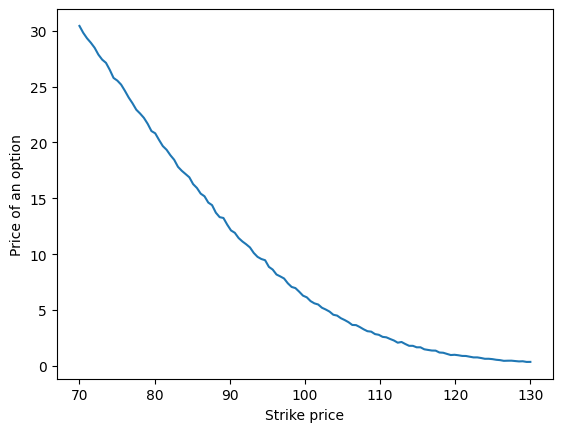

In [53]:
plt.plot(x,strike)
plt.xlabel("Strike price")
plt.ylabel("Price of an option")
plt.show()

As it can be seen from the figure the price decreases with the strike price. This happens because it is less likely that the option would be in the money if we increase the strike price. Therefore, the potential profit decreases with the strike price.


Also, we computed the numerical derivation of the given option with respect to the strike price.

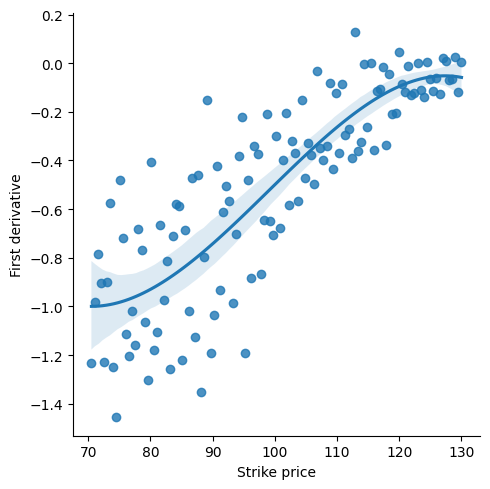

In [54]:
import seaborn as sns
d_strike = [(strike[i+1] - strike[i])/0.5 for i in range(len(x)-1)]
df = pd.DataFrame({'x':x[1:],'y':d_strike})
sns.lmplot(x='x',y='y', data=df, order=3)
plt.xlabel("Strike price")
plt.ylabel("First derivative")
plt.show()

The first derivative is negative, thus a function of price decreases with the strike price. Also, the rate of change slows down for higher K.

In [55]:
T

2

# <center>  Time to Maturity T

In [56]:
x = np.linspace(0.1,4.1,60)
time_T = [Monte_Carlo(15_000,S0,r,sigma,delta,i,K)[0] for i in x]

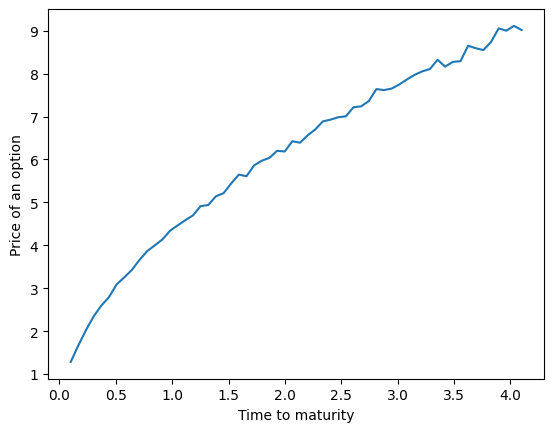

In [57]:
plt.plot(x,time_T)
plt.xlabel("Time to maturity")
plt.ylabel("Price of an option")
plt.show()

The price of an option increases with time to maturity because there is a higher probability that the option would be in the money and profit would be positive.

Also, we computed the numerical derivation of the given option with respect to time to maturity.

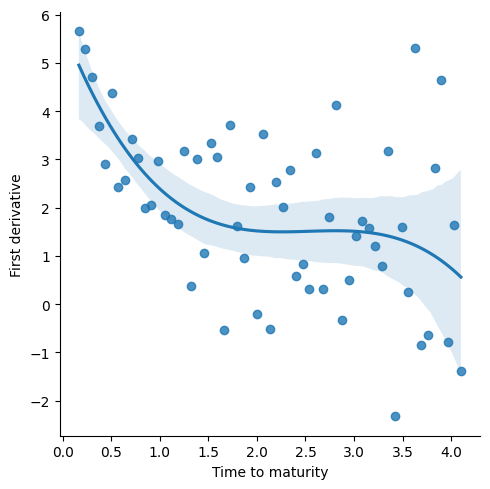

In [58]:
d_time_T = [(time_T[i+1] - time_T[i])/(x[1]-x[0]) for i in range(len(x)-1)]
df = pd.DataFrame({'x':x[1:],'y':d_time_T})
sns.lmplot(x='x',y='y', data=df, order=3)
plt.xlabel("Time to maturity")
plt.ylabel("First derivative")
plt.show()

As can be seen from the figure above the first derivative is positive, and the  price increases with time to maturity. Also, the rate of change decreases with time. It happens because the price is limited above by initial price of the stock, thus it cannot rise to infinity.$$\lim_{T\to\infty}V(T,S_0,•) = S_0$$

In [59]:
T

2

# <center> Risk-free rate r

In [60]:
x = np.linspace(0.001,0.301,150)
rho = [Monte_Carlo(15_000,S0,i,sigma,delta,T,K)[0] for i in x]

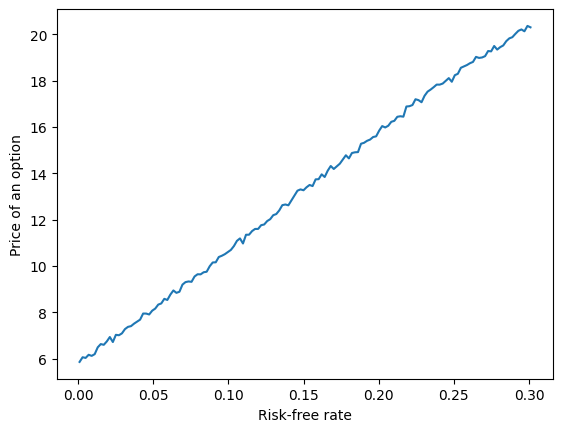

In [61]:
plt.plot(x,rho)
plt.xlabel("Risk-free rate")
plt.ylabel("Price of an option")
plt.show()

As can be seen in the figure above the price of an option increases with a risk-free rate.

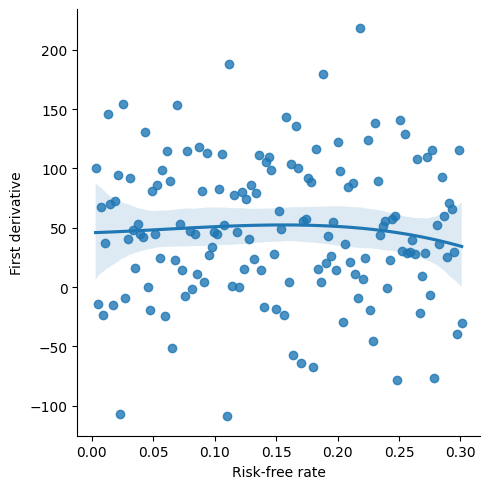

In [62]:
d_rho = [(rho[i+1] - rho[i])/(x[1]-x[0]) for i in range(len(x)-1)]
df = pd.DataFrame({'x':x[1:],'y':d_rho})
sns.lmplot(x='x',y='y', data=df, order=3)
plt.xlabel("Risk-free rate")
plt.ylabel("First derivative")
plt.show()

As can be seen first derivative is almost flat. Thus, the change of price of an option increases linearly with a risk-free rate.

# <center> Volatility $\sigma$

In [63]:
x = np.linspace(0.01,0.91,90)
sigma = [Monte_Carlo(15_000,S0,r,i,delta,T,K)[0] for i in x]

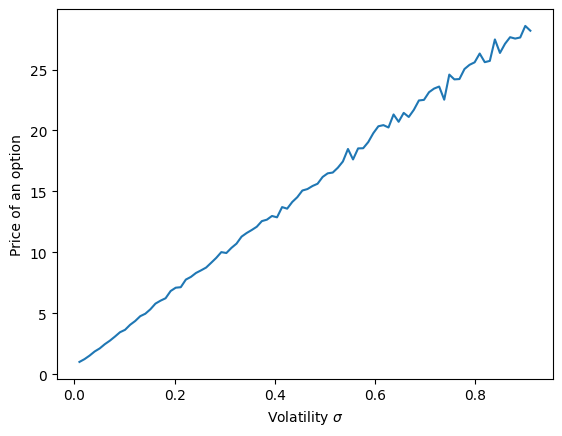

In [64]:
plt.plot(x,sigma)
plt.xlabel("Volatility $\sigma$")
plt.ylabel("Price of an option")
plt.show()

An option price increases with volatility.

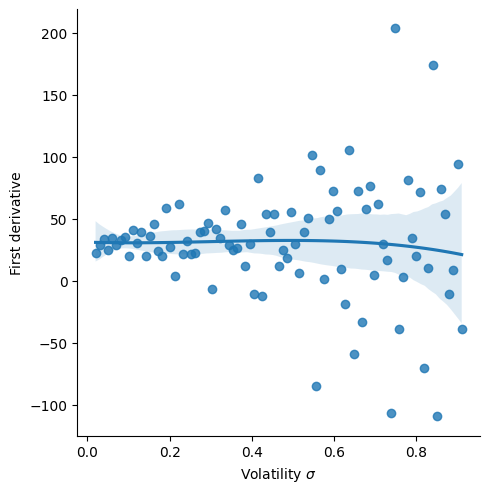

In [65]:
d_sigma = [(sigma[i+1] - sigma[i])/(x[1]-x[0]) for i in range(len(x)-1)]
df = pd.DataFrame({'x':x[1:],'y':d_sigma})
sns.lmplot(x='x',y='y', data=df, order=3)
plt.xlabel("Volatility $\sigma$")
plt.ylabel("First derivative")
plt.show()

The rate is increasing is almost stable, i.e., the price of an option increases linearly with volatility.

# <center> Question 3

**3.1** Describe the roles played by the different parameters in the
variance process $v$. Explain why a CIR process is a reasonable
assumption to model the volatility of $S$.

In the previous two questions, we were asked to compute the price of a product using the
Black-Scholes-Merton formula and on several Monte Carlo simulations. The main drawback
of those methods is the constant volatility rate. In the real world, the volatility changes
through time with certain volatility. Therefore, the price of financial products calculated
using either the Black-Scholes-Merton formula or Monte Carlo simulations is not accurate.
Now, we are going to compute the price of the given product when the volatility is defined
as a stochastic process as it is given by a Cox–Ingersoll–Ross (CIR) model.
Assume the instantaneous variance $v_t$ follows the CIR process:
$$dv_t = \kappa (\theta - v_t)dt + \xi \sqrt v_t dW_t^v$$

Assume the stock price $S$ follows:
$$dS_t = rS_r dt + \sqrt v_t S_tdW_r^S$$

where $dW_r^S$, $dW_t^v$ are Wiener processes with correlation $\rho$ , and the
parameters for the process $ν_t$ satisfies the Feller condition
$2\kappa \theta > \xi^2$.
$$dW_r^SdW_t^v = \rho dt$$

  Let's describe the roles of parameters of the CIR process. The process describes the parameter $\nu_t$ as the instantaneous variance rate at time $t$.The parameter $\theta$ is variance $\nu_t$ when $t$ tends to infinity. Parameter $\kappa$ is the speed of mean reversion. It scales the distance between $\theta$ and $\nu_t$. Altogether, the term $\kappa(\theta-\nu_t)$ corresponds to the drift term and enables the process to be mean-reverting. It means that if $(\theta>\nu_t)$ the term is positive and $\nu_t$ is increasing, if $(\theta<\nu_t)$ the term is negative and $\nu_t$ is decreasing. For that reason, it means the higher is $\kappa$ the faster $\xi$ would return to $\theta$ when $t$ increases.

The second term $\xi\sqrt{\nu_t}dW_{t}^\nu$ is a diffusion part of the volatility equation, it drives the differential equation and it is the stochastic part of the process. Therefore, without the second part, the CIR model would be deterministic. The parameter $\xi$ is the volatility of the volatility, hence it determines the variance of the process.

The parameters of the process satisfy the Feller condition:
$$2\kappa\theta>\xi^2$$
If the parameters obey this condition, the process $\nu_t$ is strictly positive.

There are numerous reasons that explain why the CIR process is often used to model the volatility of price S.
First of all, it is popular in modeling volatility because of its simplicity. The $\nu_t$ can be easily computed using numerical methods. As it was mentioned, constant volatility is a very strong assumption that sometimes gives bad results. This obstacle can be solved using the CIR model. Moreover, the model includes several parameters that can be calibrated; thus, the analyst can model the volatility better than just setting it to some constant.
Secondly, the CIR model is a mean-reversing process. It means that in the long run the variance will move to the average volatility over time. Therefore, when the CIR model is used to model the volatility of the price of the stock S the price, in the long run, will also move to the average price over time.
However, the CIR model has some drawbacks as well. One of them is the following: the model is sensitive to the chosen parameters. During the time when the volatility of the price is low, the CIR is useful and gives accurate results. Nevertheless, if the model is used to simulate the volatility during the period when the actual volatility of the stock price extends beyond the chosen parameters, the results that CIR gives are limited in scope and reliability.

**3.2** Price this Asian butterfly spread under the Heston Model using
Monte Carlo simulation.

Assume the following parameters:
$$\sqrt v_0 = \sqrt\theta = 0.21$$
$$\kappa = 0.3$$
$$\xi = 0.15$$
$$\rho = -0.75$$

Let's compute and plot price and volatility movements under the Heston model.

In [66]:
rho = -0.75
v0 = 0.21**2
theta = v0
xi = 0.15
kappa = 0.3
S0 = 100
r = 0.01
T = 2
K = 100
delta = 1/252
assert 2*kappa*theta > xi**2

In [67]:
upper_bound_xi = (2*kappa*theta)**0.5

In [68]:
def heston_model_trajectories(N,S0,r,delta,T,K,rho,kappa,xi,v0,theta):
  mu = np.array([0,0])
  cov = np.array([[1, rho] , [rho , 1]])
  n = int(T/delta)
  S = np.zeros((N, n))
  S[:, 0] = S0
  v_t = np.zeros((N, n))
  v_t[:, 0] = v0
  W = np.random.multivariate_normal(mu, cov, size=(N,n))*np.sqrt(delta)
  for i in range(n-1):
    S[:,i+1] = S[:,i]  + S[:,i]*r*delta + S[:,i]*np.sqrt(np.maximum(v_t[:,i],0)) * W[:,i,0]
    #v_t[:,i+1] = np.abs(v_t[:,i] + kappa*(theta-v_t[:,i])*delta + xi*np.sqrt(v_t[:,i])*W[:,i,1])
    #v_t[:,i+1] = v_t[:,i] + kappa*(theta-v_t[:,i])*delta + xi*np.sqrt(np.maximum(v_t[:,i],0))*W[:,i,1]
    v_t[:,i+1] = v_t[:,i] + kappa*(theta-np.maximum(v_t[:,i],0))*delta + xi*np.sqrt(np.maximum(v_t[:,i],0))*W[:,i,1]
  df_S = pd.DataFrame(S)
  df_v = pd.DataFrame(v_t)
  return df_S,df_v

In [69]:
N = 50 # number of trajectories
df_S,df_v = heston_model_trajectories(N,S0,r,delta,T,K,rho,kappa,xi,v0,theta)

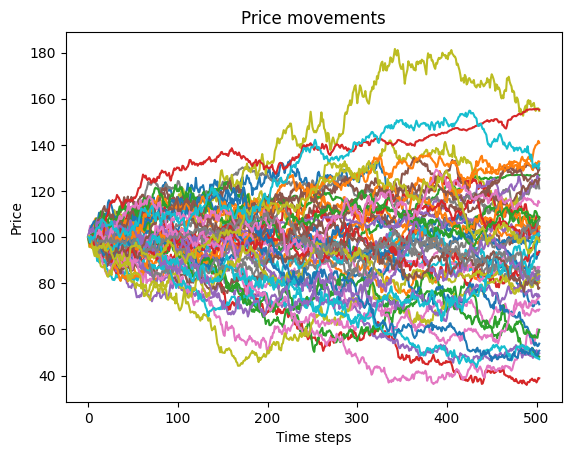

In [70]:
plt.plot(df_S.T)
plt.title("Price movements")
plt.xlabel("Time steps")
plt.ylabel("Price")
plt.show()

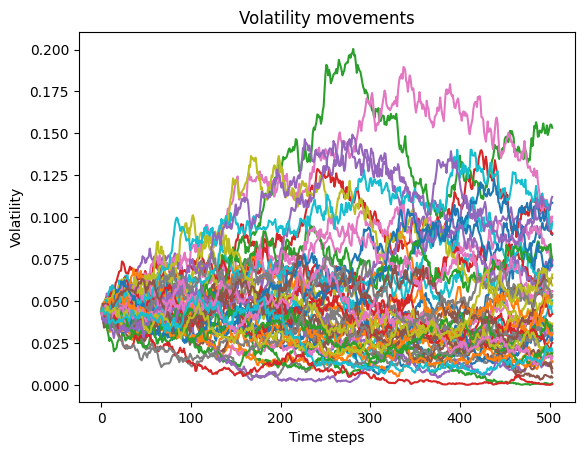

In [71]:
plt.plot(df_v.T)
plt.title("Volatility movements")
plt.xlabel("Time steps")
plt.ylabel("Volatility")
plt.show()

Let's now price the given option using the Heston model.

In [72]:
def heston_model(N,S0,r,delta,T,K,rho,kappa,xi,v0,theta ):
  mu = np.array([0,0])
  cov = np.array([[1, rho] , [rho , 1]])
  n = int(T/delta)
  S = np.zeros((N, n))
  S[:, 0] = S0
  v_t = np.zeros((N, n))
  v_t[:, 0] = v0
  W = np.random.multivariate_normal(mu, cov, size=(N,n))*np.sqrt(delta)
  for i in range(n-1):
    S[:,i+1] = S[:,i]  + S[:,i]*r*delta + S[:,i]*np.sqrt(np.maximum(v_t[:,i],0)) * W[:,i,0]
    #v_t[:,i+1] = np.abs(v_t[:,i] + kappa*(theta-v_t[:,i])*delta + xi*np.sqrt(v_t[:,i])*W[:,i,1])
    v_t[:,i+1] = v_t[:,i] + kappa*(theta-np.maximum(v_t[:,i],0))*delta + xi*np.sqrt(np.maximum(v_t[:,i],0))*W[:,i,1]
  df_S = pd.DataFrame(S)
  df_S["mean"] = df_S.mean(axis = 1) - K
  R = df_S.loc[df_S["mean"] > 0,"mean"].sum()/N
  VAR = df_S.loc[df_S["mean"] > 0,"mean"].var(ddof=1)
  return R*exp(-r*T),VAR

Feller condition does not prevent negative volatility because we have a small time step. This way, we use the full truncations method where we modify simulations of volatility in the following way:
$$v_{t+\delta} = v_t +  \kappa (\theta - v_t^+)dt + \xi \sqrt v_t^+ dW_t^v$$
Also, in order to prevent negative values in the simulation of stock we use the following:
$$S_{t+\delta} = S_t  + rS_r dt + \sqrt v_t^+ S_tdW_r^S$$
where $$x^+ = max(x,0)$$

In [73]:
d = heston_model(200_000,S0,r,1/252,T,K,rho,kappa,xi,v0,theta )
d

(7.076772579727529, 96.36871383716775)

In [74]:
M = 5
N = 100_000
V_1_HM = pd.DataFrame([heston_model(N,S0,r,delta,T,80,rho,kappa,xi,v0,theta ) for _ in range(M)],columns = ["Value","Variance"])
V_2_HM = pd.DataFrame([heston_model(N,S0,r,delta,T,100,rho,kappa,xi,v0,theta ) for _ in range(M)],columns = ["Value","Variance"])
V_3_HM = pd.DataFrame([heston_model(N,S0,r,delta,T,120,rho,kappa,xi,v0,theta ) for _ in range(M)],columns = ["Value","Variance"])


In [75]:
V_1_Val,V_1_Var = V_1_HM.mean(axis = 0)[0],V_1_HM.mean(axis = 0)[1]
V_2_Val,V_2_Var = V_2_HM.mean(axis = 0)[0],V_2_HM.mean(axis = 0)[1]
V_3_Val,V_3_Var = V_3_HM.mean(axis = 0)[0],V_3_HM.mean(axis = 0)[1]
V_1_Val,V_2_Val,V_3_Val

(21.451955289987687, 7.100295019917863, 0.9626301856482146)

In [76]:
V_0 = 3*(V_1_Val+ V_3_Val - 2 * V_2_Val)
V_0

24.64198630740053

The price of the Asian butterfly spread based on European Asian call option using Heston model is the following:  V0  = V_0

In [77]:
Var_V_0 = 9*(V_1_Var + V_3_Var + 4*V_2_Var)
Var_V_0

5619.8075194234325

In [78]:
SD = (Var_V_0/N)**0.5
CI = 1.96*SD
V_0 - CI, V_0 + CI

(24.177346096413395, 25.106626518387664)

The confidence interval is quite wide because of volatility is modeled as a stochastic process.

**3.3** Analyze the impact of parameters $n$, $\xi$ and the correlation $\rho$ between $W_t^S$ and $W_t^v$.

# <center> Number of simulations n

In [79]:
K = 100
x = np.logspace(1,4.4,200)
R = [heston_model(int(i),S0,r,delta,T,K,rho,kappa,xi,v0,theta ) for i in x ]
price,var = list(zip(*R))
SD = [i/j for i,j in zip(var,x)]

<ipython-input-80-0458016b2915>:13: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0].get_shared_x_axes().join(axs[0], axs[1])


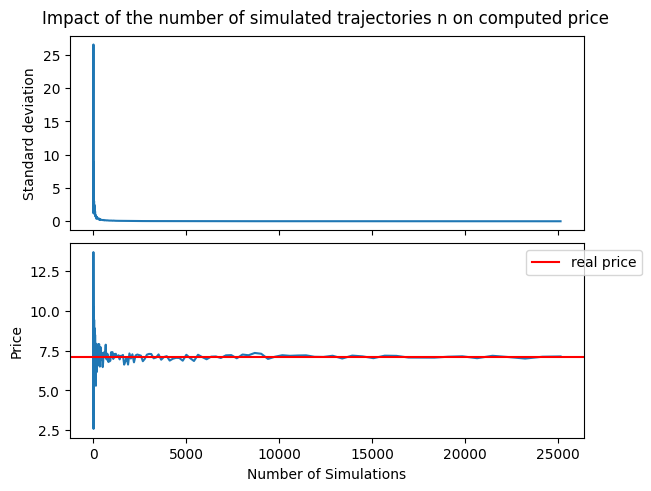

In [80]:
fig, axs = plt.subplots(2,constrained_layout = True)
fig.suptitle('Impact of the number of simulated trajectories n on computed price')
#fig.tight_layout(pad=2.5)

axs[0].plot(x, SD)
axs[0].set_ylabel('Standard deviation')

axs[1].plot(x, price)
axs[1].set_xlabel('Number of Simulations')
axs[1].set_ylabel('Price')
plt.axhline(y = V_2_Val, color = 'r', linestyle = '-',label = "real price")

axs[0].get_shared_x_axes().join(axs[0], axs[1])
axs[0].set_xticklabels([])

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.show()

The impact of n of the price of an option is similar to in Monte Carlo Simulations. Price converges to real price as the number of simulations increases.

# <center>  Volatility of volatility $\xi$

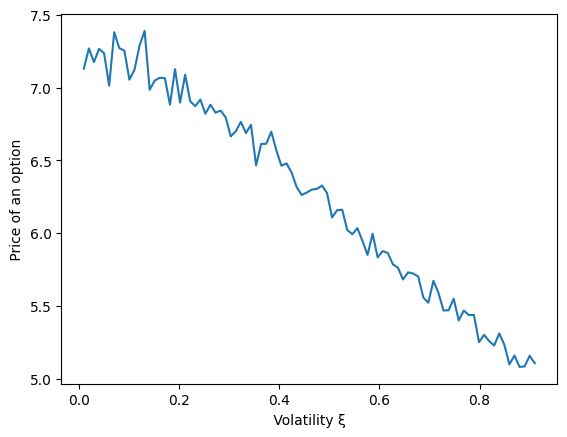

In [81]:
x = np.linspace(0.01,0.91,90)
Xi = [heston_model(15_000,S0,r,delta,T,K,rho,kappa,i,v0,theta )[0] for i in x ]
plt.plot(x,Xi)
plt.xlabel(" Volatility ξ ")
plt.ylabel(" Price of an option ")
plt.show()

The price of an Asian option decreases with volatility $\xi$ because of the chosen modification in order to prevent negative values. More trajectories of volatility approach zero as parameter $\xi$ increases. Therefore, volatility $\sigma$ gets less volatile, and thus price decreases. As it was said before, the Heston model is susceptible to parameters. The CIR model should be calibrated before use.

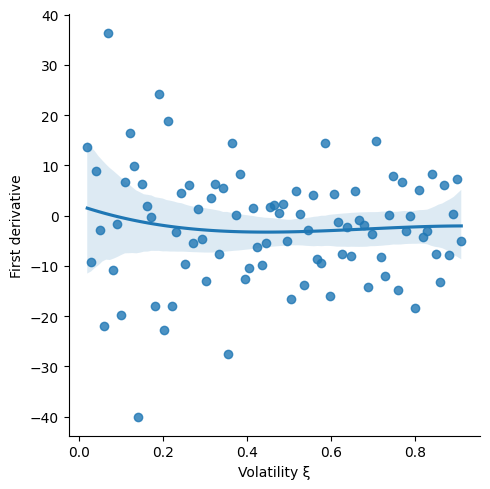

In [82]:
d_Xi = [(Xi[i+1] - Xi[i])/(x[1]-x[0]) for i in range(len(x)-1)]
df = pd.DataFrame({'x':x[1:],'y':d_Xi})
sns.lmplot(x='x',y='y', data=df, order=3)
plt.xlabel("Volatility ξ")
plt.ylabel("First derivative")
plt.show()

The figure of the first derivative shows the linear decrease of option price as the derivative is almost linear and negative.

# <center>  Correlation $\rho$

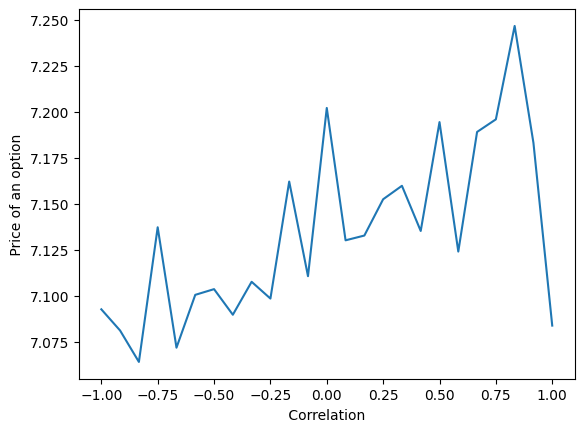

In [83]:
x = np.linspace(-1,1,25)
cor = [heston_model(100_000,S0,r,delta,T,K,i,kappa,xi,v0,theta )[0] for i in x ]
plt.plot(x,cor)
plt.xlabel(" Correlation ")
plt.ylabel(" Price of an option ")
plt.show()

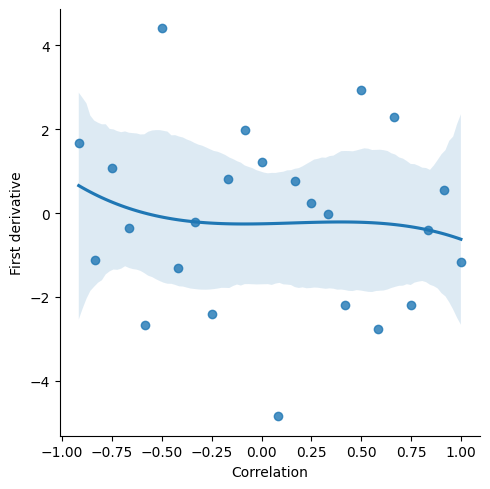

In [84]:
d_cor = [(Xi[i+1] - Xi[i])/(x[1]-x[0]) for i in range(len(x)-1)]
df = pd.DataFrame({'x':x[1:],'y':d_cor})
sns.lmplot(x='x',y='y', data=df, order=3)
plt.xlabel("Correlation")
plt.ylabel("First derivative")
plt.show()

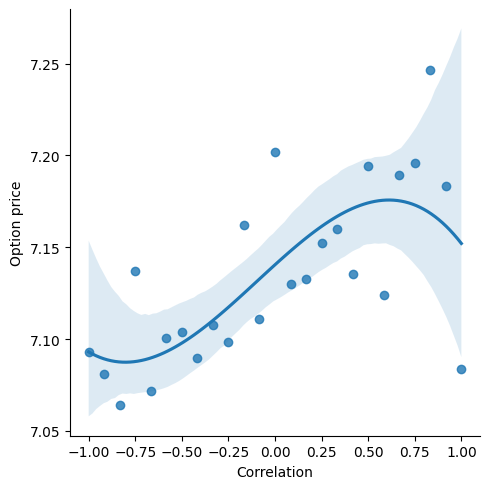

In [85]:
df = pd.DataFrame({'x':x,'y':cor})
sns.lmplot(x='x',y='y', data=df, order=3)
plt.xlabel("Correlation")
plt.ylabel("Option price")
plt.show()

The option price is not sensitive to the change of correlation, however, price changes with correlation a little bit. In order to visualize the change we increased the number of simulations to decrease the variance. Overall, the price of an option increases with correlation. When two Wiener processes are perfectly correlated the price in the highest. Price increases linearly with correlation.

Let's build asset price dencity for different correlations.

In [86]:
N = 200_000
neg_corr = heston_model_trajectories(N,S0,r,delta,T,K,-0.7,kappa,xi,v0,theta)[0].mean(axis = 1)
no_corr = heston_model_trajectories(N,S0,r,delta,T,K,0,kappa,xi,v0,theta)[0].mean(axis = 1)
pos_corr = heston_model_trajectories(N,S0,r,delta,T,K,0.7,kappa,xi,v0,theta)[0].mean(axis = 1)

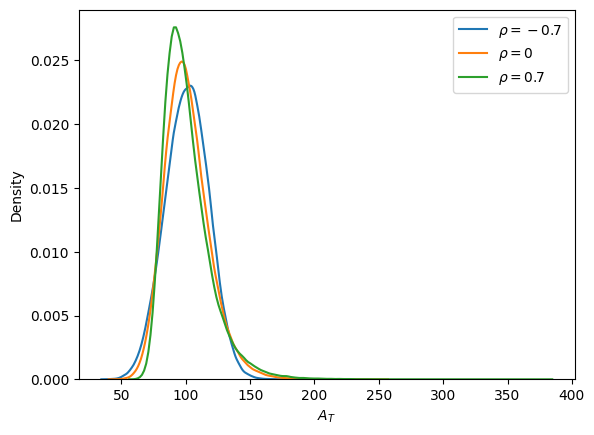

In [87]:
import seaborn as sns
fig,ax = plt.subplots()
ax = sns.kdeplot(neg_corr, label = r"$\rho = -0.7$",ax = ax)
ax = sns.kdeplot(no_corr, label = r"$\rho = 0$",ax = ax)
ax = sns.kdeplot(pos_corr, label = r"$\rho = 0.7$",ax = ax)
plt.xlabel("$A_T$")
plt.legend()
plt.show()

As can be seen from the figure the median number of average prices is decreasing with correlation. Also, the variance is decreasing with correlation. The density plot for positive correlation has fat tails which causes the highest price of the option. Whereas negative correlation produces the highest median number, positive correlation produces higher average prices.